# Assignment 4

### Chandan Kumar Sahu
### Roll No. 1911055

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
from Chandan_Library_As4 import *


# Question 1 - pRNG Multiplicative Linear Congruent Generators


In [2]:
def mlcg(n, start=0, stop=1, a=572, m=16381, c=0, seed=1):
    random_numbers = np.empty(n)
    x = seed
    
    for i in range(n):
        x = (a * x ) % m
        random_numbers[i] = start + (stop - start) * (x / m)  # Scaling to the range [start, stop)
    
    if n==1:
        return random_numbers[0]
    else:
        return random_numbers


In [40]:
print(mlcg(5))
print(mlcg(5))
print(mlcg(5))


[0.0349185  0.9733838  0.77553263 0.60466394 0.86777364]
[0.0349185  0.9733838  0.77553263 0.60466394 0.86777364]
[0.0349185  0.9733838  0.77553263 0.60466394 0.86777364]


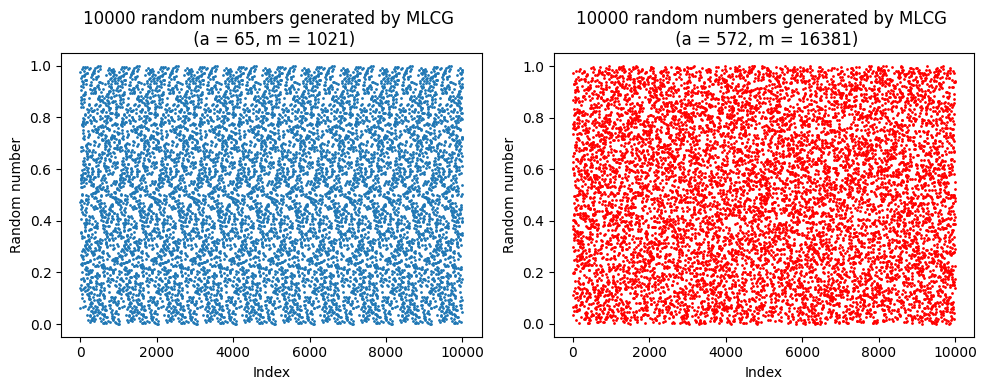

In [3]:
random_numbers_1= mlcg(10000, start=0, stop=1, a = 65, m = 1021, c=0, seed=1)
random_numbers_2 = mlcg(10000, start=0, stop=1, a = 572, m = 16381, c=0, seed=1)

plt.figure(figsize=[10, 4])
plt.subplot(1, 2, 1)
plt.plot(random_numbers_1, '.', markersize=2)
plt.title('10000 random numbers generated by MLCG \n (a = 65, m = 1021)')
plt.xlabel('Index')
plt.ylabel('Random number')

plt.subplot(1, 2, 2)
plt.plot(random_numbers_2, 'r.', markersize=2)
plt.title('10000 random numbers generated by MLCG \n (a = 572, m = 16381)')
plt.xlabel('Index')
plt.ylabel('Random number')

plt.tight_layout()


# Question 2 - Monte Carlo Integration

In [4]:
def monte_carlo(f, pdf, n, a, m, seed, start, stop):
    integral_sum, error = 0, 0
    
    random_numbers = mlcg(n, start, stop, a, m)
    for rand_num in range(len(random_numbers)):
        integral_sum += f(random_numbers[rand_num]) / pdf(random_numbers[rand_num])
        error += ( ( (f(random_numbers[rand_num])**2) / n) - (f(random_numbers[rand_num])/n)**2 )
    error = np.sqrt(error)

    # Estimate the integral
    integral_estimate = integral_sum / n
    
    return np.array(integral_estimate), np.array(error)

# def monte_carlo(f, pdf, n, a, m, seed, start, stop):
#     integral_sum = 0
#     error = 0
    
#     random_numbers = mlcg(n, start, stop, a, m)
    
#     for rand_num in random_numbers:
#         integral_sum += f(rand_num) / pdf(rand_num)
#         error += ((f(rand_num)**2) / n) - (f(rand_num)/n)**2
    
#     error = np.sqrt(error)
    
#     # Estimate the integral
#     integral_estimate = integral_sum / n
    
#     return integral_estimate, error


Estimated integral: 2.000282263750614


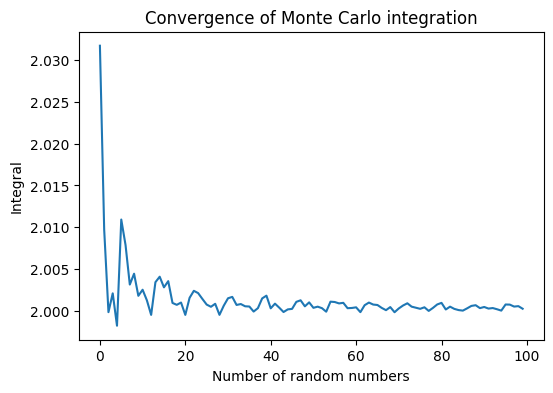

In [5]:
def f(x):
    return np.cos(x)

def pdf(x):  # pdf
    return 1 / (stop - start)

# Define the integration limits 
start = -np.pi/ 2
stop = np.pi/ 2

convergence = []
for n in range(1000, 100001, 1000):
    integral = monte_carlo(f, pdf, n, a=572, m=16381, seed=1, start=start, stop=stop)[0]
    convergence.append(integral)

print("Estimated integral:", integral)

plt.figure(figsize=(6, 4))
plt.plot(convergence)
plt.title('Convergence of Monte Carlo integration')
plt.xlabel('Number of random numbers')
plt.ylabel('Integral')
plt.show()


# Question 3 - Inverse transform method


In [34]:
def random_genQ1(a,m,x0=1):
    R=np.ones(m)
    R[0]=x0
    for i in range(1,m):
        R[i]=a*R[i-1]%m
    return(R/m)

def random_gen(a,m,i,f,x0=1):
    Ran=random_genQ1(a,m,x0)
    return(i+(f-i)*Ran)

def INT_MONT_var(integrand,funcsample,Invfunc,N=1000):
    t=Invfunc(random_gen(469,N,0,1))
    # plt.hist(t,20)
    f=sum(integrand(t)/funcsample(t))
    f2=sum((integrand(t)/funcsample(t))**2)
    F=f/N
    variance=f2/N-(f/N)**2
    return(F,variance)


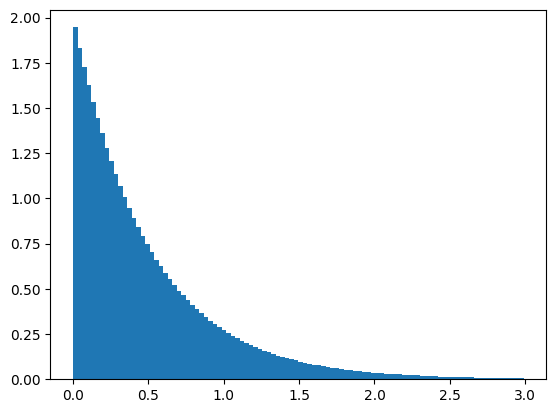

In [27]:
def func3_1(x):
    return(-0.5*np.log(1-(1-np.exp(-6))*x))

t1=func3_1(random_gen(439,1000000,0,1))
plt.hist(t1,100,density=True)
plt.show()


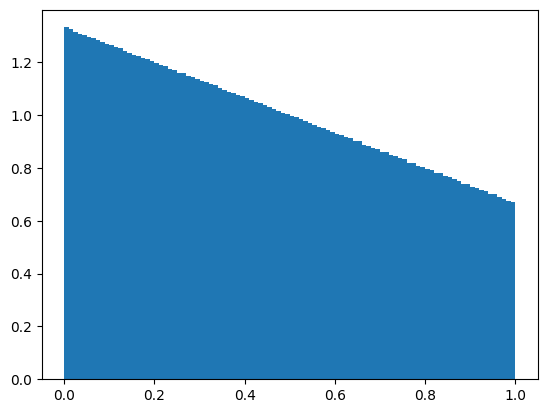

In [28]:
def func3_2(x):
    return(2-0.5*np.sqrt(16-12*x))

t2=func3_2(random_gen(439,1000000,0,1))
plt.hist(t2,100,density=True)
plt.show()


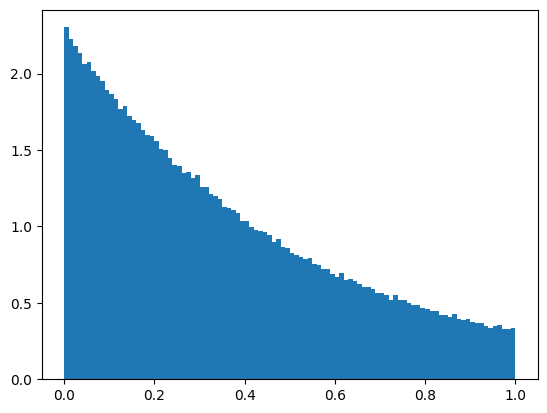

In [29]:
def func3_3(x):
    return(2-x)

def func3_4(x):
    return(np.exp(-2*x))

def accept_reject_ran_gen(f,g,c,N):
    X=func3_2(random_gen(439,100*N,0,1))
    U=random_gen(469,100*N,0,1)
    Z=[]
    i=0
    while len(Z)<N:
        if U[i]<=f(X[i])/(c*g(X[i])):
            Z.append(X[i])
        i+=1
    return(np.array(Z))

t3=accept_reject_ran_gen(func3_4,func3_3,2,500000)

plt.hist(t3,100,density=True)
plt.show()

# Question 4a - Monte Carlo Integration


In [33]:
def func4(x):
    return(np.exp(-2*x)/(1+x**2))
def func4_p1(x):
    return(0.5)

I,var=INT_MONT_var(func4,func4_p1,lambda x: 2*x,N=10000)
print("The integrand is "+str(round(I,3))+". The variance is "+str(round(var,3))+".")

The integrand is 0.399. The variance is 0.271.


In [ ]:
def f(x):
    return np.exp(-2*x) / ( 1 + x**2)

def pdf(x):
    return 0.5

def inv_pdf(x):
    return 2*x


In [9]:
def f(x):
    return np.exp(-2*x) / ( 1 + x**2)

def pdf(x):  # pdf
    return 0.5

start = 0
stop = 2
N = 100000

integral, var = monte_carlo(f, pdf, n, a=572, m=16381, seed=1, start=start, stop=stop)

print("Estimated integral:", integral)
print("Variance of the estimate:", var)


Estimated integral: 0.3914227578531479
Variance of the estimate: 0.32450573935816374


In [10]:
def f(x):
    return np.exp(-2*x) / ( 1 + x**2)

def pdf(x):  # pdf
    return np.exp(-x)

start = 0
stop = 2
N = 100000

integral, var = monte_carlo(f, pdf, n, a=572, m=16381, seed=1, start=start, stop=stop)

print("Estimated integral:", integral)
print("Variance of the estimate:", var)


Estimated integral: 0.29857133577587347
Variance of the estimate: 0.32450573935816374


In [11]:
def f(x):
    return np.exp(-2*x) / ( 1 + x**2)

def pdf(x):  # pdf
    return np.exp(-x/2)/ (2 * (1-np.exp(-1/2)) )

start = 0
stop = 2
N = 100000

integral, var = monte_carlo(f, pdf, n, a=572, m=16381, seed=1, start=start, stop=stop)

print("Estimated integral:", integral)
print("Variance of the estimate:", var)


Estimated integral: 0.18683592272380167
Variance of the estimate: 0.32450573935816374
